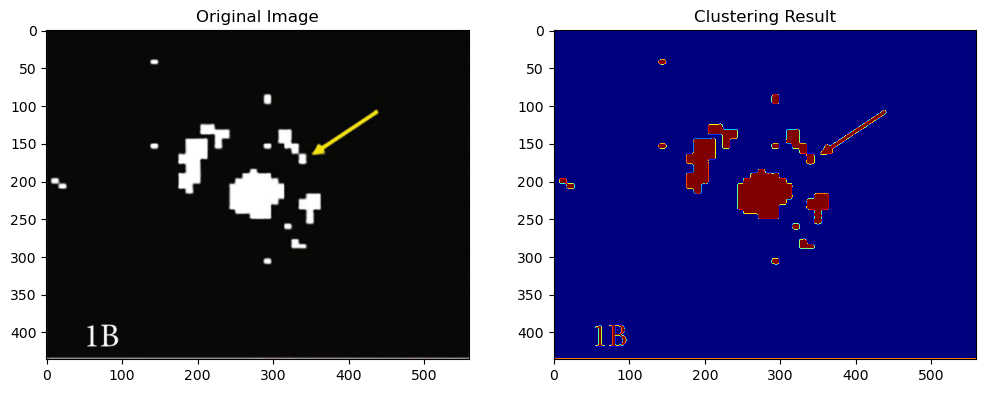

Unique labels after clustering: [0 1]
Similarity Index between Tissue 1 and Tissue 2: 87.76885490726019


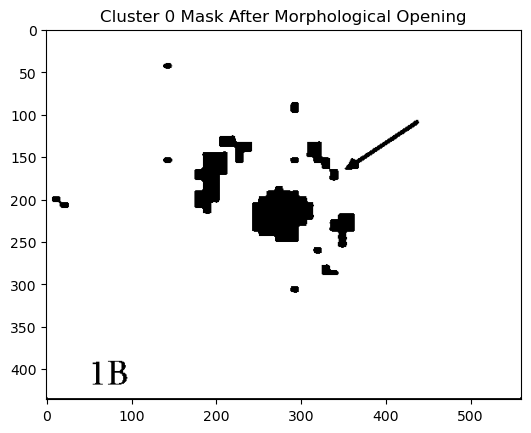

Cluster 0, Region Area: 233776.0, Eccentricity: 0.628226279741893, BBox: (0, 0, 435, 560)
Cluster 0, Region Area: 81.0, Eccentricity: 0.6757302804619293, BBox: (392, 81, 403, 89)
Cluster 0, Region Area: 112.0, Eccentricity: 0.6253527642854851, BBox: (405, 81, 418, 91)


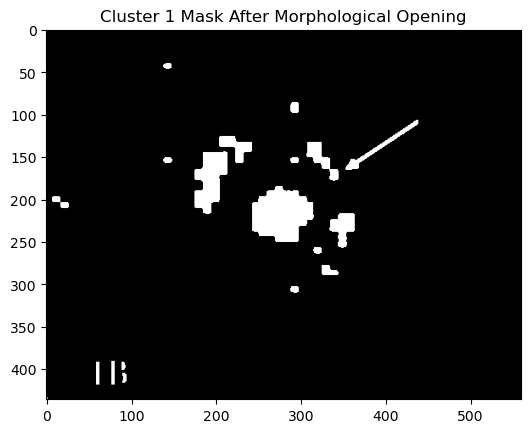

Cluster 1, Region Area: 59.0, Eccentricity: 0.7254924223448345, BBox: (40, 138, 47, 148)
Cluster 1, Region Area: 121.0, Eccentricity: 0.6430665953529009, BBox: (86, 288, 99, 298)
Cluster 1, Region Area: 590.0, Eccentricity: 0.9978339397219298, BBox: (107, 353, 166, 439)
Cluster 1, Region Area: 619.0, Eccentricity: 0.8236829611381302, BBox: (126, 204, 158, 243)
Cluster 1, Region Area: 656.0, Eccentricity: 0.9572251664036978, BBox: (133, 307, 179, 345)
Cluster 1, Region Area: 1902.0, Eccentricity: 0.9089177292094416, BBox: (144, 175, 218, 214)
Cluster 1, Region Area: 65.0, Eccentricity: 0.7518094115561124, BBox: (151, 138, 158, 149)
Cluster 1, Region Area: 64.0, Eccentricity: 0.7079198422699708, BBox: (151, 288, 158, 298)
Cluster 1, Region Area: 3492.0, Eccentricity: 0.5118578156428985, BBox: (185, 243, 251, 316)
Cluster 1, Region Area: 134.0, Eccentricity: 0.9424826956948359, BBox: (197, 7, 211, 27)
Cluster 1, Region Area: 753.0, Eccentricity: 0.7324109418445677, BBox: (217, 334, 258, 3

In [1]:
import cv2
import numpy as np
from skimage.color import rgb2lab
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
from skimage.morphology import opening, square

# Function to calculate mean color value for a given label
def calculate_mean_color_from_label(image, labels, label):
    mask = labels == label
    return np.mean(image[mask], axis=0)

# Function to calculate similarity index
def calculate_similarity(mean_color1, mean_color2):
    similarity = np.linalg.norm(mean_color1 - mean_color2)
    return similarity

# Function to analyze clusters with morphological operations
def analyze_clusters(labels, n_clusters, lab_image):
    for i in range(n_clusters):
        cluster_mask = labels == i

        # Apply morphological opening
        cleaned_mask = opening(cluster_mask, square(3))

        # Displaying each cluster mask after morphological operation
        plt.figure()
        plt.imshow(cleaned_mask, cmap='gray')
        plt.title(f'Cluster {i} Mask After Morphological Opening')
        plt.show()

        labeled_cluster = label(cleaned_mask)

        # Analyze properties of each region in the cluster
        for region in regionprops(labeled_cluster):
            area = region.area
            eccentricity = region.eccentricity
            bbox = region.bbox
            print(f"Cluster {i}, Region Area: {area}, Eccentricity: {eccentricity}, BBox: {bbox}")

# Load the image
image_path = '2.png'
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Image at {image_path} not found or could not be read.")
    exit()

# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to CIELAB color space
lab_image = rgb2lab(image)

# Reshape the image into a 2D array of pixels
pixels = lab_image.reshape((-1, 3))

# Perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=0, n_init=50)
labels = kmeans.fit_predict(pixels)

# Reshape the labels
labels = labels.reshape(lab_image.shape[:2])

# Visualize the original image and clustering result
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(labels, cmap='jet')
ax[1].set_title('Clustering Result')
plt.show()

# Check the number of unique labels
unique_labels = np.unique(labels)
print(f"Unique labels after clustering: {unique_labels}")

if len(unique_labels) != 2:
    print("Error: k-means did not produce two distinct regions.")
    exit()

# Calculate mean color values for each cluster
mean_color_tissue1 = calculate_mean_color_from_label(lab_image, labels, unique_labels[0])
mean_color_tissue2 = calculate_mean_color_from_label(lab_image, labels, unique_labels[1])

# Calculate similarity index
similarity_index = calculate_similarity(mean_color_tissue1, mean_color_tissue2)
print("Similarity Index between Tissue 1 and Tissue 2:", similarity_index)

# Analyze clusters for homogeneity/heterogeneity with morphological operations
analyze_clusters(labels, len(unique_labels), lab_image)


### Interpretation of Homogeneity vs. Heterogeneity


#### Homogeneity:

In a homogeneous distribution, we expect to see most regions within a cluster having similar characteristics in terms of area, shape (eccentricity), and distribution.
If the majority of the regions in a cluster are of similar size and shape, and are evenly distributed, it suggests homogeneity.

#### Heterogeneity:
Heterogeneous distribution is indicated by a wide variation in the area, shape, and distribution of the regions within a cluster.
Significant differences in region sizes (some very small and some very large), varying shapes (as indicated by a range of eccentricity values), and irregular distribution all suggest heterogeneity.



#### Analysis Based on Your Output


Cluster 0:

This cluster shows a mix of one very large region and several smaller regions with varying shapes.
The presence of a dominant region suggests a primary tissue type, but the existence of smaller, varied regions indicates some degree of heterogeneity.



Cluster 1:

Shows greater variability with several regions of differing sizes and shapes.
The range of region sizes (from very small to quite large) and shapes (indicated by varied eccentricity values) suggests a heterogeneous distribution of tissue.



#### Overall Assessment

The data suggests that both clusters display elements of heterogeneity, with Cluster 1 showing a more pronounced variation.
The variability within each cluster, especially Cluster 1, indicates a complex tissue structure that may be relevant for specific biological or medical analyses.



#### Important Considerations

Contextual Analysis: Understanding the biological or medical significance of this heterogeneity is crucial. For example, in pathological analysis, such variation can be critical.

Additional Analysis: Depending on the specific application, further analysis might be required. This could involve consulting with domain experts (like pathologists or biologists) or applying more advanced image analysis techniques.

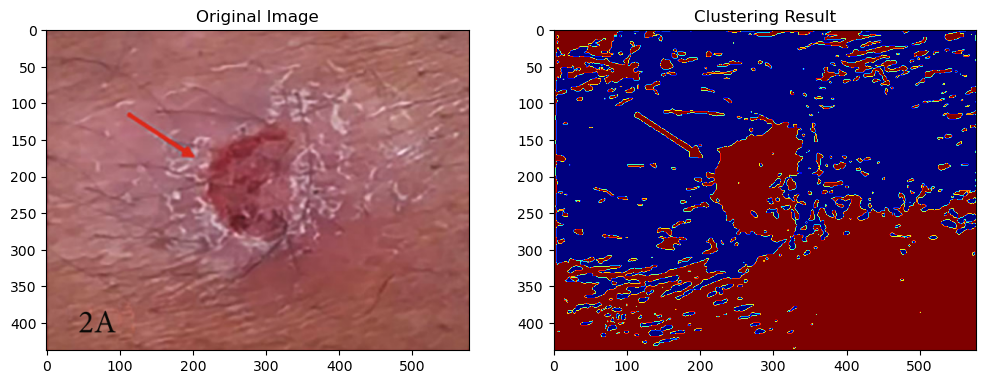

Unique labels after clustering: [0 1]
Similarity Index between Tissue 1 and Tissue 2: 12.164821869247914


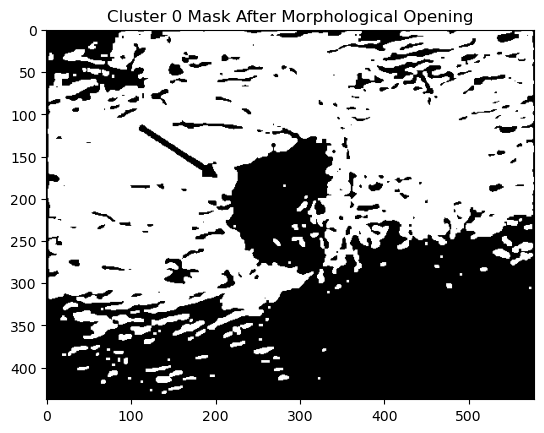

Cluster 0, Region Area: 133299.0, Eccentricity: 0.8721222715233617, BBox: (0, 2, 356, 578)
Cluster 0, Region Area: 58.0, Eccentricity: 0.8403740789063996, BBox: (15, 50, 24, 61)
Cluster 0, Region Area: 377.0, Eccentricity: 0.9565494802239548, BBox: (24, 20, 42, 70)
Cluster 0, Region Area: 45.0, Eccentricity: 0.7573203960346176, BBox: (28, 3, 37, 9)
Cluster 0, Region Area: 24.0, Eccentricity: 0.9343531843023135, BBox: (30, 65, 33, 73)
Cluster 0, Region Area: 21.0, Eccentricity: 0.5443145459415236, BBox: (46, 43, 51, 48)
Cluster 0, Region Area: 90.0, Eccentricity: 0.9158298877302677, BBox: (46, 49, 54, 65)
Cluster 0, Region Area: 53.0, Eccentricity: 0.7185036517208191, BBox: (48, 66, 56, 75)
Cluster 0, Region Area: 12.0, Eccentricity: 0.6831300510639732, BBox: (53, 32, 56, 36)
Cluster 0, Region Area: 12.0, Eccentricity: 0.6831300510639732, BBox: (54, 78, 58, 81)
Cluster 0, Region Area: 9.0, Eccentricity: 0.0, BBox: (184, 281, 187, 284)
Cluster 0, Region Area: 14.0, Eccentricity: 0.670820

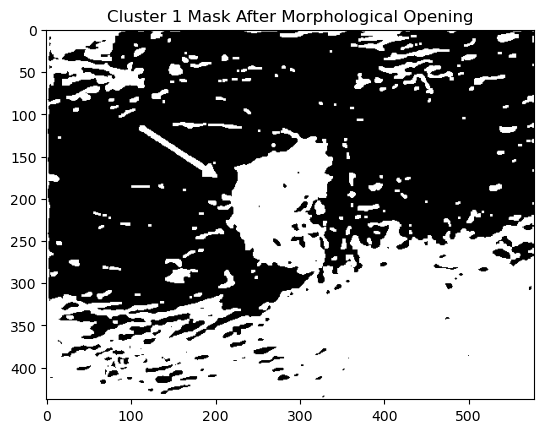

Cluster 1, Region Area: 99030.0, Eccentricity: 0.8096741587206886, BBox: (0, 0, 438, 578)
Cluster 1, Region Area: 18.0, Eccentricity: 0.9810708435174292, BBox: (0, 212, 2, 221)
Cluster 1, Region Area: 165.0, Eccentricity: 0.9963850344628006, BBox: (0, 228, 5, 279)
Cluster 1, Region Area: 452.0, Eccentricity: 0.995245738743716, BBox: (0, 277, 10, 361)
Cluster 1, Region Area: 918.0, Eccentricity: 0.9025889364807769, BBox: (0, 370, 26, 435)
Cluster 1, Region Area: 24.0, Eccentricity: 0.9894548898363074, BBox: (0, 441, 2, 453)
Cluster 1, Region Area: 81.0, Eccentricity: 0.9866617377710997, BBox: (0, 466, 5, 495)
Cluster 1, Region Area: 42.0, Eccentricity: 0.9965850782456148, BBox: (0, 528, 2, 549)
Cluster 1, Region Area: 64.0, Eccentricity: 0.9954485770036439, BBox: (0, 552, 3, 578)
Cluster 1, Region Area: 209.0, Eccentricity: 0.9304178390089506, BBox: (4, 534, 16, 560)
Cluster 1, Region Area: 21.0, Eccentricity: 0.9128709291752769, BBox: (7, 432, 10, 439)
Cluster 1, Region Area: 16.0, Ecc

In [2]:
import cv2
import numpy as np
from skimage.color import rgb2lab
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
from skimage.morphology import opening, square

# Function to calculate mean color value for a given label
def calculate_mean_color_from_label(image, labels, label):
    mask = labels == label
    return np.mean(image[mask], axis=0)

# Function to calculate similarity index
def calculate_similarity(mean_color1, mean_color2):
    similarity = np.linalg.norm(mean_color1 - mean_color2)
    return similarity

# Function to analyze clusters with morphological operations
def analyze_clusters(labels, n_clusters, lab_image):
    for i in range(n_clusters):
        cluster_mask = labels == i

        # Apply morphological opening
        cleaned_mask = opening(cluster_mask, square(3))

        # Displaying each cluster mask after morphological operation
        plt.figure()
        plt.imshow(cleaned_mask, cmap='gray')
        plt.title(f'Cluster {i} Mask After Morphological Opening')
        plt.show()

        labeled_cluster = label(cleaned_mask)

        # Analyze properties of each region in the cluster
        for region in regionprops(labeled_cluster):
            area = region.area
            eccentricity = region.eccentricity
            bbox = region.bbox
            print(f"Cluster {i}, Region Area: {area}, Eccentricity: {eccentricity}, BBox: {bbox}")

# Load the image
image_path = '4.png'
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Image at {image_path} not found or could not be read.")
    exit()

# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to CIELAB color space
lab_image = rgb2lab(image)

# Reshape the image into a 2D array of pixels
pixels = lab_image.reshape((-1, 3))

# Perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=0, n_init=50)
labels = kmeans.fit_predict(pixels)

# Reshape the labels
labels = labels.reshape(lab_image.shape[:2])

# Visualize the original image and clustering result
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(labels, cmap='jet')
ax[1].set_title('Clustering Result')
plt.show()

# Check the number of unique labels
unique_labels = np.unique(labels)
print(f"Unique labels after clustering: {unique_labels}")

if len(unique_labels) != 2:
    print("Error: k-means did not produce two distinct regions.")
    exit()

# Calculate mean color values for each cluster
mean_color_tissue1 = calculate_mean_color_from_label(lab_image, labels, unique_labels[0])
mean_color_tissue2 = calculate_mean_color_from_label(lab_image, labels, unique_labels[1])

# Calculate similarity index
similarity_index = calculate_similarity(mean_color_tissue1, mean_color_tissue2)
print("Similarity Index between Tissue 1 and Tissue 2:", similarity_index)

# Analyze clusters for homogeneity/heterogeneity with morphological operations
analyze_clusters(labels, len(unique_labels), lab_image)


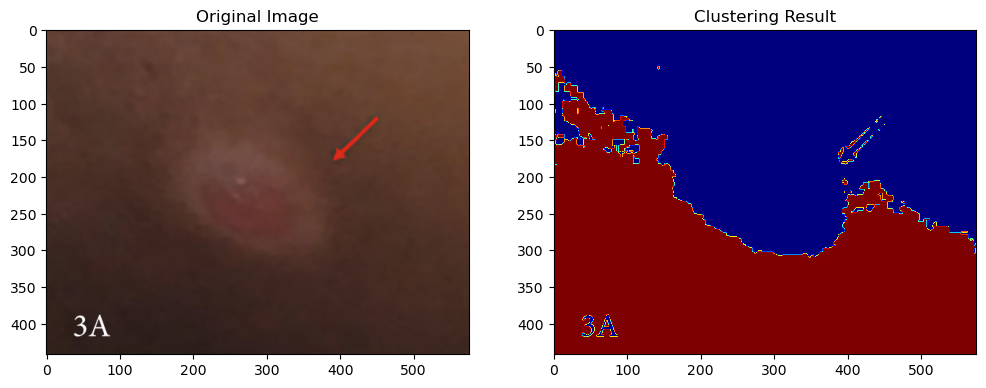

Unique labels after clustering: [0 1]
Similarity Index between Tissue 1 and Tissue 2: 13.538827718669522


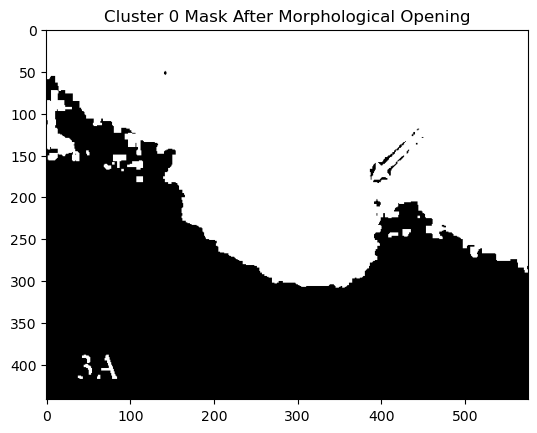

Cluster 0, Region Area: 130578.0, Eccentricity: 0.8574053374489213, BBox: (1, 0, 309, 576)
Cluster 0, Region Area: 20.0, Eccentricity: 0.837707816583391, BBox: (145, 48, 151, 52)
Cluster 0, Region Area: 146.0, Eccentricity: 0.5490897816255677, BBox: (150, 80, 166, 96)
Cluster 0, Region Area: 134.0, Eccentricity: 0.8548389030136938, BBox: (157, 97, 168, 116)
Cluster 0, Region Area: 9.0, Eccentricity: 0.0, BBox: (159, 79, 162, 82)
Cluster 0, Region Area: 45.0, Eccentricity: 0.7958253921591897, BBox: (161, 69, 168, 78)
Cluster 0, Region Area: 9.0, Eccentricity: 0.0, BBox: (167, 90, 170, 93)
Cluster 0, Region Area: 56.0, Eccentricity: 0.48795003647426666, BBox: (176, 108, 183, 116)
Cluster 0, Region Area: 9.0, Eccentricity: 0.0, BBox: (223, 444, 226, 447)
Cluster 0, Region Area: 74.0, Eccentricity: 0.6013158210565499, BBox: (239, 426, 248, 436)
Cluster 0, Region Area: 53.0, Eccentricity: 0.9241746616728969, BBox: (243, 409, 249, 421)
Cluster 0, Region Area: 54.0, Eccentricity: 0.8598936572

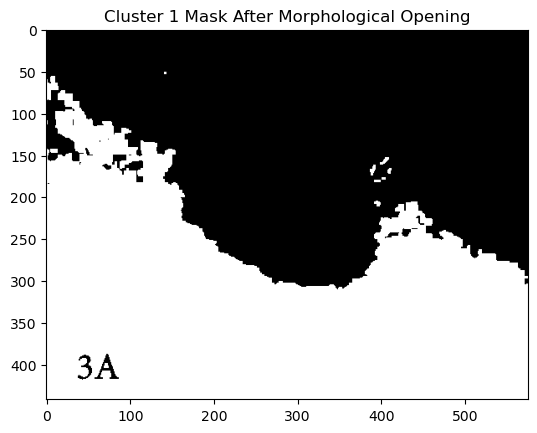

Cluster 1, Region Area: 38.0, Eccentricity: 0.9958246164193104, BBox: (0, 9, 2, 28)
Cluster 1, Region Area: 126.0, Eccentricity: 0.9996219043282831, BBox: (0, 31, 2, 94)
Cluster 1, Region Area: 6.0, Eccentricity: 0.7905694150420949, BBox: (0, 111, 2, 114)
Cluster 1, Region Area: 26.0, Eccentricity: 0.9910312089651149, BBox: (0, 117, 2, 130)
Cluster 1, Region Area: 14.0, Eccentricity: 0.9682458365518543, BBox: (0, 175, 2, 182)
Cluster 1, Region Area: 9.0, Eccentricity: 0.0, BBox: (51, 141, 54, 144)
Cluster 1, Region Area: 254.0, Eccentricity: 0.8769428813939348, BBox: (56, 0, 85, 15)
Cluster 1, Region Area: 121064.0, Eccentricity: 0.9096167954955043, BBox: (73, 0, 442, 576)
Cluster 1, Region Area: 10.0, Eccentricity: 0.9354143466934853, BBox: (109, 0, 114, 2)
Cluster 1, Region Area: 44.0, Eccentricity: 0.8358624590255322, BBox: (143, 5, 148, 14)
Cluster 1, Region Area: 49.0, Eccentricity: 0.9436065732820539, BBox: (153, 399, 162, 410)
Cluster 1, Region Area: 55.0, Eccentricity: 0.919611

In [3]:
import cv2
import numpy as np
from skimage.color import rgb2lab
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
from skimage.morphology import opening, square

# Function to calculate mean color value for a given label
def calculate_mean_color_from_label(image, labels, label):
    mask = labels == label
    return np.mean(image[mask], axis=0)

# Function to calculate similarity index
def calculate_similarity(mean_color1, mean_color2):
    similarity = np.linalg.norm(mean_color1 - mean_color2)
    return similarity

# Function to analyze clusters with morphological operations
def analyze_clusters(labels, n_clusters, lab_image):
    for i in range(n_clusters):
        cluster_mask = labels == i

        # Apply morphological opening
        cleaned_mask = opening(cluster_mask, square(3))

        # Displaying each cluster mask after morphological operation
        plt.figure()
        plt.imshow(cleaned_mask, cmap='gray')
        plt.title(f'Cluster {i} Mask After Morphological Opening')
        plt.show()

        labeled_cluster = label(cleaned_mask)

        # Analyze properties of each region in the cluster
        for region in regionprops(labeled_cluster):
            area = region.area
            eccentricity = region.eccentricity
            bbox = region.bbox
            print(f"Cluster {i}, Region Area: {area}, Eccentricity: {eccentricity}, BBox: {bbox}")

# Load the image
image_path = '3.png'
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Image at {image_path} not found or could not be read.")
    exit()

# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to CIELAB color space
lab_image = rgb2lab(image)

# Reshape the image into a 2D array of pixels
pixels = lab_image.reshape((-1, 3))

# Perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=0, n_init=50)
labels = kmeans.fit_predict(pixels)

# Reshape the labels
labels = labels.reshape(lab_image.shape[:2])

# Visualize the original image and clustering result
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(labels, cmap='jet')
ax[1].set_title('Clustering Result')
plt.show()

# Check the number of unique labels
unique_labels = np.unique(labels)
print(f"Unique labels after clustering: {unique_labels}")

if len(unique_labels) != 2:
    print("Error: k-means did not produce two distinct regions.")
    exit()

# Calculate mean color values for each cluster
mean_color_tissue1 = calculate_mean_color_from_label(lab_image, labels, unique_labels[0])
mean_color_tissue2 = calculate_mean_color_from_label(lab_image, labels, unique_labels[1])

# Calculate similarity index
similarity_index = calculate_similarity(mean_color_tissue1, mean_color_tissue2)
print("Similarity Index between Tissue 1 and Tissue 2:", similarity_index)

# Analyze clusters for homogeneity/heterogeneity with morphological operations
analyze_clusters(labels, len(unique_labels), lab_image)
